# Notebook 03: User Participation Trends

In this notebook, we analyze how Kaggle user engagement has evolved over time across different activities:

- Kernel publishing
- Forum discussions
- Dataset contributions
- Competition submissions

We also segment these trends by user performance tier to identify power users, emerging contributors, and shifts in community dynamics.


In [1]:
%pip install matplotlib seaborn pandas --quiet

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

sns.set(style="whitegrid")

DATA_DIR = Path("../data")
OUTPUT_DIR = Path("../outputs/Notebook 03")
OUTPUT_DIR.mkdir(parents=True, exist_ok=True)


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


In [2]:
users = pd.read_csv(DATA_DIR / "Users.csv", low_memory=False)
kernels = pd.read_csv(DATA_DIR / "Kernels.csv", low_memory=False)
forum = pd.read_csv(DATA_DIR / "ForumMessages.csv", low_memory=False)
datasets = pd.read_csv(DATA_DIR / "Datasets.csv", low_memory=False)
subs = pd.read_csv(DATA_DIR / "Submissions.csv", low_memory=False)

users = users.rename(columns={"Id": "UserId"})
kernels = kernels.rename(columns={"AuthorUserId": "UserId"})
forum = forum.rename(columns={"AuthorUserId": "UserId"})
datasets = datasets.rename(columns={"OwnerUserId": "UserId"})
subs = subs.rename(columns={"UserId": "UserId"})

print(f"Users: {users.shape}")
print(f"Kernels: {kernels.shape}")
print(f"Forum Messages: {forum.shape}")
print(f"Datasets: {datasets.shape}")
print(f"Submissions: {subs.shape}")

Users: (24934330, 7)
Kernels: (1516137, 16)
Forum Messages: (2717018, 9)
Datasets: (504044, 16)
Submissions: (16064322, 12)


## Extracting User Activity Timelines

We begin by extracting the year of activity for each type of contribution: kernel publishing, forum messaging, dataset uploading, and competition submissions.


In [3]:
kernels["Year"] = pd.to_datetime(kernels["CreationDate"], errors="coerce").dt.year
forum["Year"] = pd.to_datetime(forum["PostDate"], errors="coerce").dt.year
datasets["Year"] = pd.to_datetime(datasets["CreationDate"], errors="coerce").dt.year
subs["Year"] = pd.to_datetime(subs["SubmissionDate"], errors="coerce").dt.year

## Annual Participation Trends

Let's visualize how many unique users contributed to each activity every year.

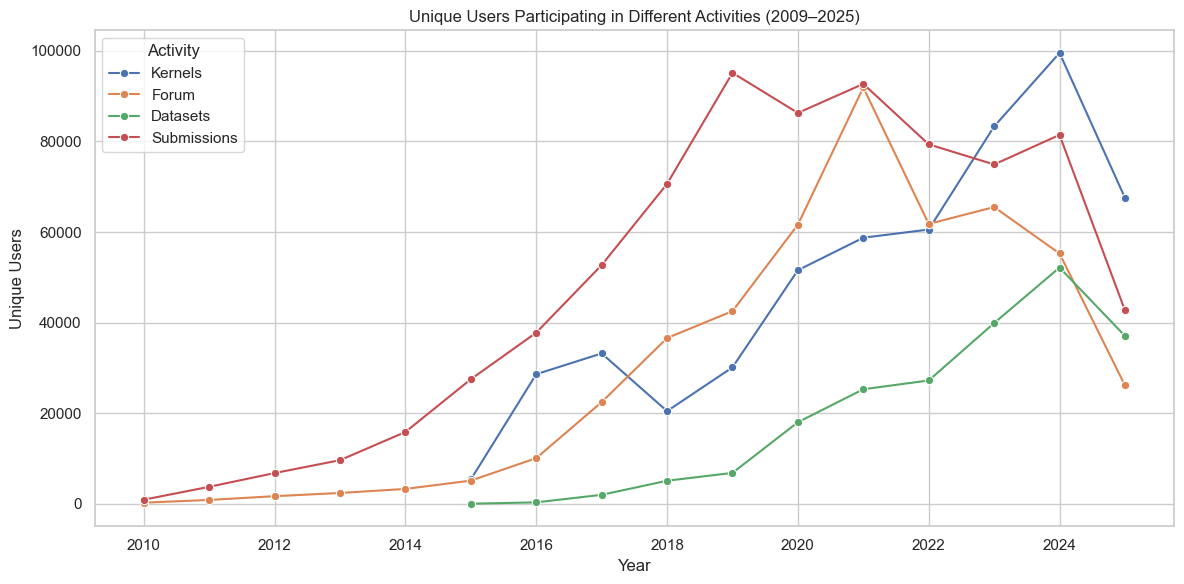

In [6]:
def count_users(df, year_col, user_col, label):
    return (
        df.dropna(subset=[year_col])
        .groupby(year_col)[user_col]
        .nunique()
        .reset_index(name="Users")
        .assign(Activity=label)
    )

df_kernels = count_users(kernels, "Year", "UserId", "Kernels")
df_forum = count_users(forum, "Year", "PostUserId", "Forum")
df_datasets = count_users(datasets, "Year", "CreatorUserId", "Datasets")
df_subs = count_users(subs, "Year", "SubmittedUserId", "Submissions")

all_participation = pd.concat([df_kernels, df_forum, df_datasets, df_subs])

plt.figure(figsize=(12, 6))
sns.lineplot(data=all_participation, x="Year", y="Users", hue="Activity", marker="o")
plt.title("Unique Users Participating in Different Activities (2009–2025)")
plt.ylabel("Unique Users")
plt.xlabel("Year")
plt.grid(True)
plt.tight_layout()
plt.savefig(OUTPUT_DIR / "user_activity_trends.png", dpi=300)
plt.show()

## Participation Trends by Performance Tier

Do higher-tier users consistently contribute more? Here, we explore user activity segmented by Kaggle performance tier.

In [7]:
forum = forum.rename(columns={"PostUserId": "UserId"})
subs = subs.rename(columns={"SubmittedUserId": "UserId"})

user_tiers = users[["UserId", "PerformanceTier"]]

kernels_tiered = kernels.merge(user_tiers, on="UserId", how="left")
forum_tiered = forum.merge(user_tiers, on="UserId", how="left")
datasets_tiered = datasets.merge(user_tiers, on="UserId", how="left")
subs_tiered = subs.merge(user_tiers, on="UserId", how="left")

def count_users_by_tier(df, label):
    return (
        df.dropna(subset=["Year", "PerformanceTier"])
        .groupby(["Year", "PerformanceTier"])["UserId"]
        .nunique()
        .reset_index(name="Users")
        .assign(Activity=label)
    )

tier_kernels = count_users_by_tier(kernels_tiered, "Kernels")
tier_forum = count_users_by_tier(forum_tiered, "Forum")
tier_datasets = count_users_by_tier(datasets_tiered, "Datasets")
tier_subs = count_users_by_tier(subs_tiered, "Submissions")

tiered_participation = pd.concat([tier_kernels, tier_forum, tier_datasets, tier_subs])

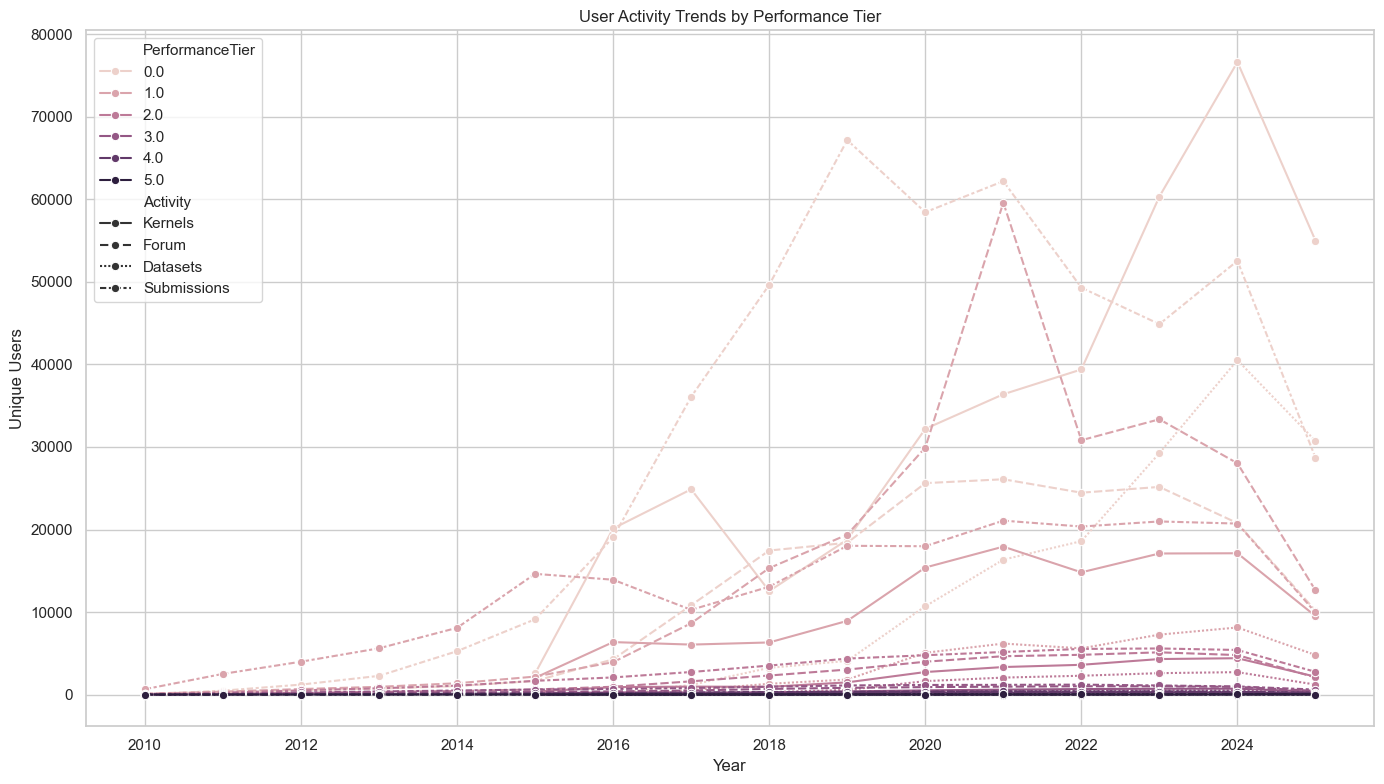

In [8]:
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=tiered_participation,
    x="Year", y="Users", hue="PerformanceTier", style="Activity", marker="o"
)
plt.title("User Activity Trends by Performance Tier")
plt.ylabel("Unique Users")
plt.xlabel("Year")
plt.grid(True)
plt.tight_layout()
plt.savefig(OUTPUT_DIR / "tiered_participation_trends.png", dpi=300)
plt.show()

## Takeaways:

- User participation in kernels, forum discussions, and datasets peaked during the pandemic era and has gradually declined since.
- The number of users submitting to competitions has remained more stable, hinting at their enduring value.
- Higher-tier users show sustained participation across all years, particularly in kernels and competitions.

In the next notebook, we’ll analyze *how medal-winning users evolve over time* — from their first medals to long-term participation.

**Next:** `04_medalist_evolution.ipynb`